Importing libraries (Pandas, NumPy, Matplotlib, Seaborn)

Contains the preprocessing work before analysis phase.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

Reading in the .csv file containing the data and checkin how that data is displyed.

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Listing all of the column headers (i.e. the variables)

In [3]:
list(df.columns.values)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info() # we want numerical columns to be int or float. We should look into columns of type object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Finding out how many '?' values are in the sqft_basement column.

In [7]:
df.isin(['?']).sum(axis=0)

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

Replacing '?' object with a numeric value so that we can operate on the column later.  Assuming "?" means there is no basement to measure.

In [8]:
df['sqft_basement'] = df['sqft_basement'].replace("?",'0.0')  # assume no measurement = no basement

In [9]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [10]:
df['sqft_basement'].astype(float)

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

Checking which columns in the dataframe have null values.

In [11]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Replacing all NaN values with 0s to see if it affects analysis significantly, or if it is negligible.

In [12]:
df['waterfront'] = df['waterfront'].fillna(0)
print(df['waterfront'].unique())

[0. 1.]


Drill down into the houses with no renovation date - 3842 houses impacted

In [13]:
unclear_renovated = df[pd.isnull(df['yr_renovated'])]
unclear_renovated.head(100)
unclear_renovated.describe()
len(unclear_renovated)

3842

In [14]:
df['view'] = df['view'].fillna(0)
print(df['view'].unique())

[0. 3. 4. 2. 1.]


In [15]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
print(df['yr_renovated'].unique())

[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


Year of renovation = 0 for 3842 properties.  We propose resetting the '0' to the year of build. 
Could alternatively use year of build + mean renovation, etc but that's a bit of a stretch......

In [16]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
#Checking that there are only 146 waterfront properties listed => mean * observations

In [18]:
0.00676 * 21500 

145.34

Replacing yr_renovated = 0 with year of build as 0 is an outlier in the dates

In [19]:
df['yr_renovated'] = np.where(df['yr_renovated']==0, df['yr_built'], df['yr_renovated'])

In [20]:
df['yr_renovated'].unique()

array([1955., 1991., 1933., 1965., 1987., 2001., 1995., 1963., 1960.,
       2003., 1942., 1927., 1977., 1900., 1979., 1994., 1916., 1921.,
       1969., 1947., 1968., 1985., 1941., 1915., 1909., 1948., 2005.,
       1929., 1981., 2002., 1904., 1996., 2000., 1984., 2014., 1922.,
       1959., 1966., 1953., 1950., 2008., 1954., 1973., 1925., 1989.,
       1972., 1986., 1956., 1992., 1964., 1952., 1961., 2006., 1988.,
       1962., 1939., 1967., 1975., 1980., 1910., 1983., 2010., 1978.,
       1905., 1971., 1945., 1924., 1990., 1926., 2004., 1923., 2007.,
       2013., 1976., 1949., 1999., 1901., 1993., 1920., 1997., 1943.,
       1940., 1918., 1928., 1974., 1911., 1930., 1936., 1937., 1982.,
       1908., 1931., 1957., 1998., 1913., 1907., 1958., 2011., 2012.,
       1912., 1917., 1946., 1951., 1932., 1944., 1902., 2009., 1970.,
       2015., 1934., 1938., 1919., 1914., 1906., 1903., 1935.])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [22]:
df['sqft_basement'].astype(float)

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [24]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


Creating a compounding curve with Case-Schiller House Inflation Data for 2015 - 2016, and 2016 - 2019.
 
 https://fred.stlouisfed.org/series/SEXRNSA


In [26]:
# Creating a string date column to use for column merge
df['date_key']= pd.to_datetime(df['date'])
df['date_key'] = df['date_key'].astype(str)

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_key
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,2014-10-13
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014-12-09
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,2015-02-25
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,2014-12-09
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,2015-02-18


The implied daily house price inflation Yield Curve is saved in the file 'seattle_house_price_inflation.csv'. Daily rates are backed out from the monthly index published in the https://fred.stlouisfed.org/series/SEXRNSA . date_key is the column to join on, multiple sale price * compound factor to EOY 2015 equivalent.

Curve build was done in excel using the Case_Schiller Seattle Inflation monthly index values for 2014-2015, using a linear interpolation for daily points.

In [28]:
inf = pd.read_csv('seattle_house_price_inflation.csv')
inf

,date_key,Compounding,Discounting
0,2014-01-01,1.179408,0.847883
1,2014-01-02,1.179178,0.848049
2,2014-01-03,1.178948,0.848214
3,2014-01-04,1.178718,0.848379
4,2014-01-05,1.178488,0.848545
...,...,...,...
726,2015-12-28,1.000116,0.999884
727,2015-12-29,1.000077,0.999923
728,2015-12-30,1.000039,0.999961
729,2015-12-31,1.000000,1.000000


In [29]:
df = pd.merge(df,inf)
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_key,Compounding,Discounting
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,1955.0,98178,47.5112,-122.257,1340,5650,2014-10-13,1.099314,0.909658
1,4036801170,10/13/2014,380000.0,4,1.75,1760,7300,1.0,0.0,0.0,...,1956,1956.0,98008,47.6034,-122.125,1680,7500,2014-10-13,1.099314,0.909658


Create columne to show house sales in end of 2015 price equivalent (to refelct house inflation) = 'price_dec_2015'

In [30]:
df['price_dec_15'] = round(df['price']*df['Compounding'],2)

Create a 2020 - price column based on end of 2015 * Case-Schiller Seattle Index for the period 2016-EOY 2019

In [31]:
jan_2016 = 186.488
latest_observation = 253.793

price_growth_2016_2019 = latest_observation / jan_2016
price_growth_2016_2019

1.3609079404572948

In [32]:
df['price_dec_19']= round(df['price'] * price_growth_2016_2019, 2)

In [33]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,date_key,Compounding,Discounting,price_dec_15,price_dec_19
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,2014-10-13,1.099314,0.909658,243937.78,301985.47
1,4036801170,10/13/2014,380000.0,4,1.75,1760,7300,1.0,0.0,0.0,...,98008,47.6034,-122.125,1680,7500,2014-10-13,1.099314,0.909658,417739.33,517145.02


Quick check that the transfromations look good

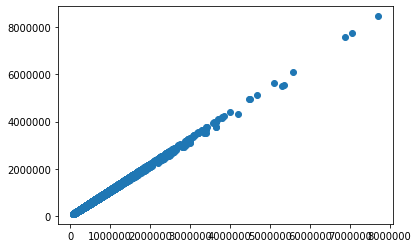

In [34]:
import matplotlib.pyplot as plt
import pandas
plt.scatter(x=df['price'], y=df['price_dec_15'])
plt.show()

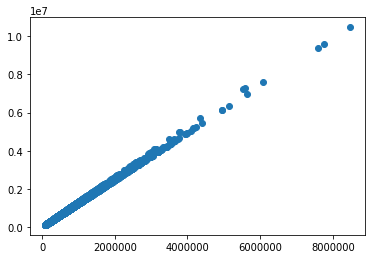

In [35]:
import matplotlib.pyplot as plt
import pandas
plt.scatter(x=df['price_dec_15'], y=df['price_dec_19'])
plt.show()

Remove duplicates, keep the second occurance, the most recent sale

In [36]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,date_key,Compounding,Discounting,price_dec_15,price_dec_19
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,2014-10-13,1.099314,0.909658,243937.78,301985.47
1,4036801170,10/13/2014,380000.0,4,1.75,1760,7300,1.0,0.0,0.0,...,98008,47.6034,-122.125,1680,7500,2014-10-13,1.099314,0.909658,417739.33,517145.02
2,1310900260,10/13/2014,318888.0,4,1.75,2320,12000,1.0,0.0,0.0,...,98032,47.3644,-122.280,2120,9880,2014-10-13,1.099314,0.909658,350558.05,433977.21
3,1373800295,10/13/2014,1450000.0,3,3.00,4380,6320,2.0,0.0,3.0,...,98199,47.6452,-122.411,3080,7680,2014-10-13,1.099314,0.909658,1594005.34,1973316.51
4,5102400105,10/13/2014,400000.0,4,1.00,1420,4875,1.5,0.0,0.0,...,98115,47.6942,-122.321,1110,5413,2014-10-13,1.099314,0.909658,439725.61,544363.18


In [37]:
# sort by date of sale in descending order
df.sort_values('date_key', inplace=True)
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,date_key,Compounding,Discounting,price_dec_15,price_dec_19
10845,5056500260,5/2/2014,440000.0,4,2.25,2160,8119,1.0,0.0,0.0,...,98006,47.5443,-122.177,1850,9000,2014-05-02,1.109072,0.901654,487991.86,598799.49
10814,4040800810,5/2/2014,420000.0,3,2.25,2000,8030,1.0,0.0,0.0,...,98008,47.6188,-122.114,2070,8250,2014-05-02,1.109072,0.901654,465810.41,571581.33
10815,7197300105,5/2/2014,550000.0,4,2.50,1940,10500,1.0,0.0,0.0,...,98052,47.6830,-122.114,2200,10500,2014-05-02,1.109072,0.901654,609989.82,748499.37


### Drop duplicate ids, keeping the most recent id / sale as most representative of current market

In [38]:
df = df.drop_duplicates(subset='id', keep="last")

In [39]:
len(df)

21420

In [40]:
df.to_csv("kc_housing_data_cleaned_with_15_19_prices.csv", index=False)